## Simple random sampling

The simplest method of sampling a populationis known as simple random sampling  (sometimes abbreviated to "SRS"), and involves picking rows at random, one at a time, where each row has the same chance of being picked as any other.

In [116]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import itertools

In [5]:
attrition_pop = pd.read_feather('/Users/starburned/data_analytics_projects/data/attrition.feather')

In [6]:
attrition_pop.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,21,0.0,Travel_Rarely,391,Research_Development,15,College,Life_Sciences,High,Male,...,Excellent,Very_High,0,0,6,Better,0,0,0,0
1,19,1.0,Travel_Rarely,528,Sales,22,Below_College,Marketing,Very_High,Male,...,Excellent,Very_High,0,0,2,Good,0,0,0,0
2,18,1.0,Travel_Rarely,230,Research_Development,3,Bachelor,Life_Sciences,High,Male,...,Excellent,High,0,0,2,Better,0,0,0,0
3,18,0.0,Travel_Rarely,812,Sales,10,Bachelor,Medical,Very_High,Female,...,Excellent,Low,0,0,2,Better,0,0,0,0
4,18,1.0,Travel_Frequently,1306,Sales,5,Bachelor,Marketing,Medium,Male,...,Excellent,Very_High,0,0,3,Better,0,0,0,0


In [7]:
len(attrition_pop)

1470

In [8]:
# Sample 70 rows using simple random sampling and set the seed
attrition_samp = attrition_pop.sample(n=70, random_state=18900217)

In [9]:
attrition_samp

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1134,35,0.0,Travel_Rarely,583,Research_Development,25,Master,Medical,High,Female,...,Excellent,High,1,16,3,Good,16,10,10,1
1150,52,0.0,Non-Travel,585,Sales,29,Master,Life_Sciences,Low,Male,...,Excellent,Medium,2,16,3,Good,9,8,0,0
531,33,0.0,Travel_Rarely,931,Research_Development,14,Bachelor,Medical,Very_High,Female,...,Excellent,Very_High,1,8,5,Better,8,7,1,6
395,31,0.0,Travel_Rarely,1332,Research_Development,11,College,Medical,High,Male,...,Excellent,Very_High,0,6,2,Good,6,5,0,1
392,29,0.0,Travel_Rarely,942,Research_Development,15,Below_College,Life_Sciences,Medium,Female,...,Excellent,Low,1,6,2,Good,5,4,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,27,0.0,Travel_Frequently,1410,Sales,3,Below_College,Medical,Very_High,Female,...,Outstanding,Medium,2,6,3,Better,6,5,0,4
1180,36,0.0,Travel_Rarely,530,Sales,2,Master,Life_Sciences,High,Female,...,Excellent,High,0,17,2,Good,13,7,6,7
230,26,0.0,Travel_Rarely,1443,Sales,23,Bachelor,Marketing,High,Female,...,Excellent,High,1,5,2,Good,2,2,0,0
211,29,0.0,Travel_Frequently,410,Research_Development,2,Below_College,Life_Sciences,Very_High,Female,...,Excellent,High,3,4,3,Better,3,2,0,2


## Systematic sampling

One sampling method that avoids randomness is called systematic sampling. Here, you pick rows from the population at regular intervals.

For example, if the population dataset had one thousand rows, and you wanted a sample size of five, you could pick rows 0, 200, 400, 600, and 800.

In [10]:
# Set the sample size to 70
sample_size = 70

# Calculate the population size from attrition_pop
pop_size = len(attrition_pop)

# Calculate the interval
interval = pop_size // sample_size

## Is systematic sampling OK?

Systematic sampling has a problem: if the data has been sorted, or there is some sort of pattern or meaning behind the row order, then the resulting sample may not be representative of the whole population. The problem can be solved by shuffling the rows, but then systematic sampling is equivalent to simple random sampling.

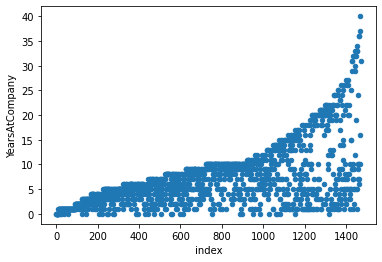

In [12]:
# Add an index column to attrition_pop
attrition_pop_id = attrition_pop.reset_index()

# Plot YearsAtCompany vs. index for attrition_pop_id
attrition_pop_id.plot(kind='scatter', x='index', y='YearsAtCompany');

## Proportional stratified sampling

If you are interested in subgroups within the population, then you may need to carefully control the counts of each subgroup within the population. Proportional stratified sampling results in subgroup sizes within the sample that are representative of the subgroup sizes within the population. It is equivalent to performing a simple random sample on each subgroup.

In [13]:
# Proportion of employees by Education level
education_counts_pop = attrition_pop['Education'].value_counts(normalize=True)
# Print education_counts_pop
education_counts_pop

Bachelor         0.389116
Master           0.270748
College          0.191837
Below_College    0.115646
Doctor           0.032653
Name: Education, dtype: float64

In [14]:
# Proportional stratified sampling for 40% of each Education group
attrition_strat = attrition_pop.groupby('Education').sample(frac=0.4, random_state=2022)
# Calculate the Education level proportions from attrition_strat
education_counts_strat = attrition_strat['Education'].value_counts(normalize=True)

In [15]:
education_counts_strat

Bachelor         0.389456
Master           0.270408
College          0.192177
Below_College    0.115646
Doctor           0.032313
Name: Education, dtype: float64

## Equal counts stratified sampling

If one subgroup is larger than another subgroup in the population, but you don't want to reflect that difference in your analysis, then you can use equal counts stratified sampling to generate samples where each subgroup has the same amount of data. For example, if you are analyzing blood types, O is the most common blood type worldwide, but you may wish to have equal amounts of O, A, B, and AB in your sample.

In [16]:
# Get 30 employees from each Education group
attrition_eq = attrition_pop.groupby('Education').sample(n=30, random_state=2022)

In [21]:
# Get the proportions from attrition_eq
attrition_eq['Education'].value_counts(normalize=True)

Below_College    0.2
College          0.2
Bachelor         0.2
Master           0.2
Doctor           0.2
Name: Education, dtype: float64

## Weighted sampling

Stratified sampling provides rules about the probability of picking rows from your dataset at the subgroup level. A generalization of this is weighted sampling, which lets you specify rules about the probability of picking rows at the row level. The probability of picking any given row is proportional to the weight value for that row.

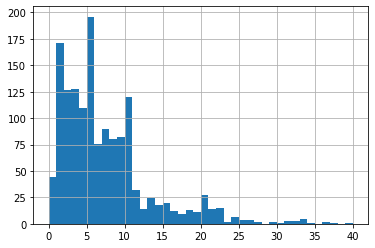

In [23]:
# Plot YearsAtCompany from attrition_pop as a histogram
attrition_pop['YearsAtCompany'].hist(bins=np.arange(0,41,1));

In [24]:
# Sample 400 employees weighted by YearsAtCompany
attrition_weight = attrition_pop.sample(n=400, weights="YearsAtCompany")

In [26]:
attrition_weight['YearsAtCompany'].value_counts(normalize=True)

10    0.1425
5     0.1075
8     0.0825
9     0.0700
20    0.0525
3     0.0450
6     0.0425
4     0.0400
7     0.0350
15    0.0325
2     0.0325
22    0.0300
11    0.0300
14    0.0300
16    0.0250
19    0.0250
13    0.0225
12    0.0200
18    0.0200
21    0.0150
33    0.0125
17    0.0125
24    0.0125
26    0.0100
1     0.0100
25    0.0075
29    0.0050
27    0.0050
32    0.0050
36    0.0050
37    0.0025
30    0.0025
31    0.0025
40    0.0025
34    0.0025
23    0.0025
Name: YearsAtCompany, dtype: float64

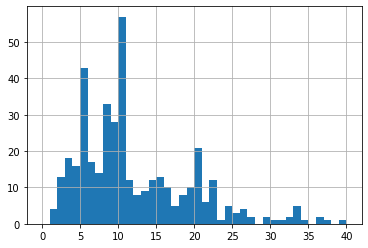

In [31]:
# Plot YearsAtCompany from attrition_weight as a histogram
attrition_weight['YearsAtCompany'].hist(bins=np.arange(0,41,1));

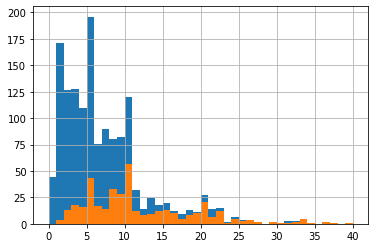

In [32]:
# Which is higher? The mean YearsAtCompany from attrition_pop or the mean YearsAtCompany from attrition_weight?
attrition_pop['YearsAtCompany'].hist(bins=np.arange(0,41,1));
attrition_weight['YearsAtCompany'].hist(bins=np.arange(0,41,1));

In [33]:
attrition_pop['YearsAtCompany'].mean()

7.0081632653061225

In [34]:
attrition_weight['YearsAtCompany'].mean()

11.6325

## Cluster sampling
Cluster sampling is a two-stage sampling technique that is closely related to stratified sampling. First, you randomly sample which subgroups to include in the sample, then randomly sample rows within each subgroup.

In [37]:
# Create a list of unique JobRole values
job_roles_pop = list(attrition_pop['JobRole'].unique())

# Randomly sample four JobRole values
job_roles_samp = random.sample(job_roles_pop, k=4)

In [39]:
job_roles_pop

['Research_Scientist',
 'Sales_Representative',
 'Laboratory_Technician',
 'Human_Resources',
 'Sales_Executive',
 'Manufacturing_Director',
 'Healthcare_Representative',
 'Research_Director',
 'Manager']

In [38]:
job_roles_samp

['Sales_Representative',
 'Research_Scientist',
 'Sales_Executive',
 'Human_Resources']

In [51]:
# Filter for rows where JobRole is in job_roles_samp
jobrole_condition = attrition_pop['JobRole'].isin(job_roles_samp)

In [52]:
attrition_filtered = attrition_pop[jobrole_condition]

In [53]:
attrition_filtered.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,21,0.0,Travel_Rarely,391,Research_Development,15,College,Life_Sciences,High,Male,...,Excellent,Very_High,0,0,6,Better,0,0,0,0
1,19,1.0,Travel_Rarely,528,Sales,22,Below_College,Marketing,Very_High,Male,...,Excellent,Very_High,0,0,2,Good,0,0,0,0
3,18,0.0,Travel_Rarely,812,Sales,10,Bachelor,Medical,Very_High,Female,...,Excellent,Low,0,0,2,Better,0,0,0,0
4,18,1.0,Travel_Frequently,1306,Sales,5,Bachelor,Marketing,Medium,Male,...,Excellent,Very_High,0,0,3,Better,0,0,0,0
5,27,0.0,Non-Travel,443,Research_Development,3,Bachelor,Medical,Very_High,Male,...,Excellent,High,3,0,6,Good,0,0,0,0


In [54]:
attrition_filtered['JobRole'].value_counts()

Sales_Executive              326
Research_Scientist           292
Sales_Representative          83
Human_Resources               52
Healthcare_Representative      0
Laboratory_Technician          0
Manager                        0
Manufacturing_Director         0
Research_Director              0
Name: JobRole, dtype: int64

In [55]:
attrition_filtered[attrition_filtered['JobRole']=='Healthcare_Representative']

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [56]:
# Remove categories with no rows
attrition_filtered['JobRole'] = attrition_filtered['JobRole'].cat.remove_unused_categories()

/var/folders/yr/qvf5bdj935s_gqpnv17l7lp40000gn/T/ipykernel_62885/2426580873.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attrition_filtered['JobRole'] = attrition_filtered['JobRole'].cat.remove_unused_categories()


In [57]:
# Randomly sample 10 employees from each sampled job role
attrition_clust = attrition_filtered.groupby('JobRole').sample(n=10, random_state=2022)

In [58]:
attrition_clust

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1348,44,1.0,Travel_Rarely,1376,Human_Resources,1,College,Medical,Medium,Male,...,Excellent,Very_High,1,24,1,Better,20,6,3,6
886,41,0.0,Non-Travel,552,Human_Resources,4,Bachelor,Human_Resources,High,Male,...,Excellent,Medium,1,10,4,Better,3,2,1,2
983,39,0.0,Travel_Rarely,141,Human_Resources,3,Bachelor,Human_Resources,High,Female,...,Excellent,High,1,12,3,Bad,8,3,3,6
88,27,1.0,Travel_Frequently,1337,Human_Resources,22,Bachelor,Human_Resources,Low,Female,...,Excellent,Low,0,1,2,Better,1,0,0,0
189,34,0.0,Travel_Rarely,829,Human_Resources,3,College,Human_Resources,High,Male,...,Excellent,High,1,4,1,Bad,3,2,0,2
160,24,0.0,Travel_Frequently,897,Human_Resources,10,Bachelor,Medical,Low,Male,...,Excellent,Very_High,1,3,2,Better,2,2,2,1
839,46,0.0,Travel_Rarely,991,Human_Resources,1,College,Life_Sciences,Very_High,Female,...,Excellent,High,0,10,3,Best,7,6,5,7
966,30,0.0,Travel_Rarely,1240,Human_Resources,9,Bachelor,Human_Resources,High,Male,...,Excellent,Very_High,0,12,2,Bad,11,9,4,7
162,28,0.0,Non-Travel,280,Human_Resources,1,College,Life_Sciences,High,Male,...,Excellent,Medium,1,3,2,Better,3,2,2,2
1231,37,0.0,Travel_Rarely,1239,Human_Resources,8,College,Other,High,Male,...,Excellent,High,0,19,4,Good,10,0,4,7


## Sample methods comparison

Compare the performance of point estimates using simple, stratified, and cluster sampling. Before doing that, you'll have to set up the samples.
You'll use the RelationshipSatisfaction column of the attrition_pop dataset, which categorizes the employee's relationship with the company. It has four levels: Low, Medium, High, and Very_High.

In [59]:
# Perform simple random sampling to get 0.25 of the population
attrition_srs = attrition_pop.sample(frac=0.25, random_state=2022)

In [60]:
# Perform stratified sampling to get 0.25 of each relationship group
attrition_strat = attrition_pop.groupby('RelationshipSatisfaction').sample(frac=0.25, random_state=2022)

In [77]:
attrition_strat['RelationshipSatisfaction'].value_counts()

High         115
Very_High    108
Medium        76
Low           69
Name: RelationshipSatisfaction, dtype: int64

In [62]:
len(attrition_pop) /4

367.5

In [89]:
# Create a list of unique RelationshipSatisfaction values
satisfaction_unique = list(attrition_pop['RelationshipSatisfaction'].unique())

# Randomly sample 2 unique satisfaction values
satisfaction_samp = random.sample(satisfaction_unique, k=2)

# Filter for satisfaction_samp and clear unused categories from RelationshipSatisfaction
satis_condition = attrition_pop['RelationshipSatisfaction'].isin(satisfaction_samp)
attrition_clust_prep = attrition_pop[satis_condition]
attrition_clust_prep['RelationshipSatisfaction'] = attrition_clust_prep['RelationshipSatisfaction']\
.cat.remove_unused_categories()

/var/folders/yr/qvf5bdj935s_gqpnv17l7lp40000gn/T/ipykernel_62885/3725462826.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attrition_clust_prep['RelationshipSatisfaction'] = attrition_clust_prep['RelationshipSatisfaction']\


In [84]:
# Perform cluster sampling on the selected group, getting 0.25 of attrition_pop
attrition_clust = attrition_clust_prep.groupby('RelationshipSatisfaction').sample(n=367, 
                                                                                  random_state=2022, replace=True)

In [96]:
# Mean Attrition by RelationshipSatisfaction group
mean_attrition_pop = attrition_pop.groupby('RelationshipSatisfaction')['Attrition'].mean()
mean_attrition_pop

RelationshipSatisfaction
Low          0.206522
Medium       0.148515
High         0.154684
Very_High    0.148148
Name: Attrition, dtype: float64

In [73]:
# Calculate the same thing for the simple random sample 
mean_attrition_srs = attrition_srs.groupby('RelationshipSatisfaction')['Attrition'].mean()
mean_attrition_srs

RelationshipSatisfaction
Low          0.134328
Medium       0.164179
High         0.160000
Very_High    0.155963
Name: Attrition, dtype: float64

In [90]:
# Calculate the same thing for the stratified sample 
mean_attrition_strat = attrition_strat.groupby('RelationshipSatisfaction')['Attrition'].mean()
mean_attrition_strat

RelationshipSatisfaction
Low          0.144928
Medium       0.078947
High         0.165217
Very_High    0.129630
Name: Attrition, dtype: float64

In [91]:
# Calculate the same thing for the cluster sample
mean_attrition_clust = attrition_clust.groupby('RelationshipSatisfaction')['Attrition'].mean()
mean_attrition_clust

RelationshipSatisfaction
Medium       0.163488
Very_High    0.136240
Name: Attrition, dtype: float64

### The numbers are all fairly similar, with the notable exception that cluster sampling only gives results for the clusters included in the sample

## Calculating relative errors

The size of the sample you take affects how accurately the point estimates reflect the corresponding population parameter. For example, when you calculate a sample mean, you want it to be close to the population mean. However, if your sample is too small, this might not be the case.

The most common metric for assessing accuracy is relative error. This is the absolute difference between the population parameter and the point estimate, all divided by the population parameter. It is sometimes expressed as a percentage.

In [97]:
mean_attrition_pop = attrition_pop['Attrition'].mean()

In [98]:
mean_attrition_pop

0.16122448979591836

In [99]:
# Generate a simple random sample of 50 rows, with seed 2022
attrition_srs50 = attrition_pop.sample(n=50, random_state=2022)

# Calculate the mean employee attrition in the sample
mean_attrition_srs50 = attrition_srs50['Attrition'].mean()

# Calculate the relative error percentage
rel_error_pct50 = 100 * abs(mean_attrition_pop-mean_attrition_srs50) / mean_attrition_pop

In [103]:
rel_error_pct50

62.78481012658227

In [101]:
# Generate a simple random sample of 100 rows, with seed 2022
attrition_srs100 = attrition_pop.sample(n=100, random_state=2022)

# Calculate the mean employee attrition in the sample
mean_attrition_srs100 = attrition_srs100['Attrition'].mean()

# Calculate the relative error percentage
rel_error_pct100 =  100 * abs(mean_attrition_pop-mean_attrition_srs100) / mean_attrition_pop

In [102]:
rel_error_pct100

6.962025316455695

As you increase the sample size, the relative error decreases quickly at first, then more slowly as it drops to zero.

## Replicating samples

When you calculate a point estimate such as a sample mean, the value you calculate depends on the rows that were included in the sample. That means that there is some randomness in the answer. In order to quantify the variation caused by this randomness, you can create many samples and calculate the sample mean (or another statistic) for each sample.

In [105]:
# Create an empty list
mean_attritions=[]
# Loop 500 times to create 500 sample means
for _ in range(500):
    mean_attritions.append(attrition_pop.sample(n=60)['Attrition'].mean())

In [106]:
mean_attritions[:10]

[0.16666666666666666,
 0.08333333333333333,
 0.13333333333333333,
 0.21666666666666667,
 0.15,
 0.08333333333333333,
 0.16666666666666666,
 0.21666666666666667,
 0.13333333333333333,
 0.16666666666666666]

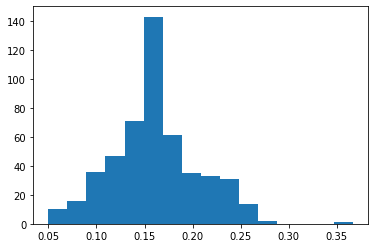

In [108]:
# Create a histogram of the 500 sample means
plt.hist(mean_attritions,bins=16);

As sample size increases, on average each sample mean has a lower relative error compared to the population mean, thus reducing the range of the distribution

## Exact sampling distribution

To quantify how the point estimate (sample statistic) you are interested in varies, you need to know all the possible values it can take and how often. That is, you need to know its distribution.

The distribution of a sample statistic is called the sampling distribution. When we can calculate this exactly, rather than using an approximation, it is known as the exact sampling distribution.

Let's take another look at the sampling distribution of dice rolls. This time, we'll look at five eight-sided dice. (These have the numbers one to eight.)

In [112]:
def expand_grid(data_dict):
    rows = itertools.product(*data_dict.values())
    return pd.DataFrame.from_records(rows, columns=data_dict.keys())

In [117]:
dice = expand_grid({
    'die1': [1,2,3,4,5,6,7,8],
    'die2': [1,2,3,4,5,6,7,8],
    'die3': [1,2,3,4,5,6,7,8],
    'die4': [1,2,3,4,5,6,7,8],
    'die5': [1,2,3,4,5,6,7,8]
})

In [118]:
dice

,die1,die2,die3,die4,die5
0,1,1,1,1,1
1,1,1,1,1,2
2,1,1,1,1,3
3,1,1,1,1,4
4,1,1,1,1,5
...,...,...,...,...,...
32763,8,8,8,8,4
32764,8,8,8,8,5
32765,8,8,8,8,6
32766,8,8,8,8,7


In [119]:
# Add a column of mean rolls and convert to a categorical
dice['mean_roll'] = (dice['die1']+dice['die2']+dice['die3']+dice['die4']+ dice['die5']) /5 
dice['mean_roll'] = dice['mean_roll'].astype('category')

In [120]:
dice

,die1,die2,die3,die4,die5,mean_roll
0,1,1,1,1,1,1.0
1,1,1,1,1,2,1.2
2,1,1,1,1,3,1.4
3,1,1,1,1,4,1.6
4,1,1,1,1,5,1.8
...,...,...,...,...,...,...
32763,8,8,8,8,4,7.2
32764,8,8,8,8,5,7.4
32765,8,8,8,8,6,7.6
32766,8,8,8,8,7,7.8


In [127]:
dice['mean_roll'].value_counts(normalize=True)

4.6    0.075073
4.4    0.075073
4.2    0.072632
4.8    0.072632
5.0    0.067932
4.0    0.067932
3.8    0.061340
5.2    0.061340
5.4    0.053406
3.6    0.053406
3.4    0.044861
5.6    0.044861
3.2    0.036316
5.8    0.036316
3.0    0.028259
6.0    0.028259
2.8    0.021057
6.2    0.021057
2.6    0.014954
6.4    0.014954
2.4    0.010071
6.6    0.010071
2.2    0.006409
6.8    0.006409
7.0    0.003845
2.0    0.003845
7.2    0.002136
1.8    0.002136
1.6    0.001068
7.4    0.001068
1.4    0.000458
7.6    0.000458
7.8    0.000153
1.2    0.000153
1.0    0.000031
8.0    0.000031
Name: mean_roll, dtype: float64

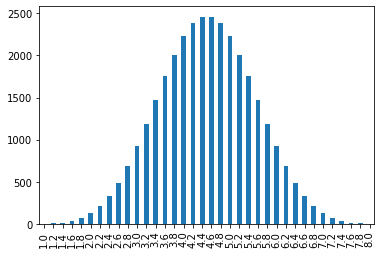

In [128]:
dice['mean_roll'].value_counts(ascending=True, sort=False).plot(kind='bar');

## Approximate sampling distribution

Calculating the exact sampling distribution is only possible in very simple situations. With just five eight-sided dice, the number of possible rolls is 8**5, which is over thirty thousand. When the dataset is more complicated, for example, where a variable has hundreds or thousands of categories, the number of possible outcomes becomes too difficult to compute exactly.

In this situation, you can calculate an approximate sampling distribution by simulating the exact sampling distribution. That is, you can repeat a procedure over and over again to simulate both the sampling process and the sample statistic calculation process.

In [130]:
# Sample one to eight, five times, with replacement
five_rolls = np.random.choice(list(range(1,9)),size=5, replace=True)

# Print the mean of five_rolls
five_rolls.mean()

5.2

In [131]:
# Replicate the sampling code 1000 times
sample_means_1000 = []
for _ in range(1000):
    sample_means_1000.append(np.random.choice(list(range(1, 9)), size=5, replace=True).mean())
   
    
# Print the first 10 entries of the result
print(sample_means_1000[0:10])

[4.2, 5.4, 4.2, 5.0, 4.2, 3.2, 3.8, 2.8, 4.6, 5.2]


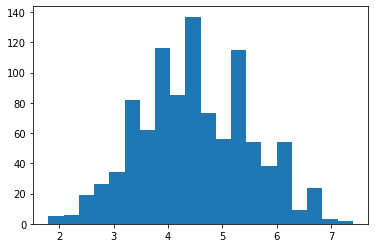

In [133]:
# Draw a histogram of sample_means_1000 with 20 bins
plt.hist(sample_means_1000, bins=20);

The exact sampling distribution can only be calculated if you know what the population is and if the problems are small and simple enough to compute. Otherwise, the approximate sampling distribution must be used.

## Population & sampling distribution means

One of the useful features of sampling distributions is that you can quantify them. Specifically, you can calculate summary statistics on them. Here, you'll look at the relationship between the mean of the sampling distribution and the population parameter's mean.

Three sampling distributions are provided. For each, the employee attrition dataset was sampled using simple random sampling, then the mean attrition was calculated. This was done 1000 times to get a sampling distribution of mean attritions. One sampling distribution used a sample size of 5 for each replicate, one used 50, and one used 500.

In [134]:
sample_means_5 = []
for _ in range(5):
    sample_means_5.append(np.random.choice(list(range(1, 9)), size=5, replace=True).mean())

In [135]:
sample_means_50 = []
for _ in range(50):
    sample_means_50.append(np.random.choice(list(range(1, 9)), size=5, replace=True).mean())

In [136]:
sample_means_500 = []
for _ in range(500):
    sample_means_500.append(np.random.choice(list(range(1, 9)), size=5, replace=True).mean())

In [139]:
np.mean(sample_means_5), np.mean(sample_means_50), np.mean(sample_means_500)

(4.4, 4.832, 4.464799999999999)

## Population & sampling distribution variation

You just calculated the mean of the sampling distribution and saw how it is an estimate of the corresponding population parameter. Similarly, as a result of the central limit theorem, the standard deviation of the sampling distribution has an interesting relationship with the population parameter's standard deviation and the sample size.

In [140]:
# Calculate the std. dev. of the mean attritions for each sampling distribution
sd_of_means_5 = np.std(sample_means_5,ddof=1)
sd_of_means_50 = np.std(sample_means_50, ddof=1)
sd_of_means_500 = np.std(sample_means_500, ddof=1)

In [141]:
# Print the results
print(sd_of_means_5)
print(sd_of_means_50)
print(sd_of_means_500)

1.5811388300841898
1.0104434266040563
1.0369336636669153


The amount of variation in the sampling distribution is related to the amount of variation in the population and the sample size. This is another consequence of the Central Limit Theorem.

The standard deviation of the sampling distribution is approximately equal to the population standard deviation divided by the square root of the sample size.